## the Global Retail Sales Data: Orders, Reviews & Trends 
Source: kaggle (https://www.kaggle.com/datasets/adarsh0806/influencer-merchandise-sales)
Analyzed  by SulistiaF

#### Invite library 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import data

In [2]:
df = pd.read_csv("C:/Users/ASUS/Downloads/merch_sales.csv")

#### View upper 5 data

In [3]:
df.head(5)

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.


#### Shows Number of data and variables 

In [4]:
df.shape

(7394, 15)

#### Shows information of data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7394 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7394 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

#### Shows the number of null data 

In [6]:
df.isna().sum()

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64

Berdasarkan output yang di atas menunjukkan bahwa tidak terdapat data yang kosong pada data set. Sehingga tidak perlu dilakukan data cleaning (pembersihan data kosong)pada dataset.

The output showed there is no null data so no need for data cleaning.

#### Shows summary of the data 

In [7]:
df.describe()

,Order ID,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,159735.134028,26.455504,55.165404,14.633487,69.798891,1.668109,115.832026,3.499053
std,23040.247194,5.208202,39.575614,24.815719,46.702326,1.081398,118.067960,1.389731
min,120005.000000,18.000000,9.000000,0.000000,9.000000,1.000000,9.000000,1.000000
25%,139895.750000,22.000000,15.000000,0.000000,20.000000,1.000000,40.000000,3.000000
50%,159577.500000,26.000000,65.000000,0.000000,65.000000,1.000000,90.000000,4.000000
75%,179869.750000,31.000000,97.000000,40.000000,100.000000,2.000000,137.000000,5.000000
max,199994.000000,35.000000,130.000000,100.000000,230.000000,5.000000,1000.000000,5.000000


#### Makes a plot of bestsellers product

<Axes: title={'center': 'Top Product Categories by Quantity'}, ylabel='Product Category'>

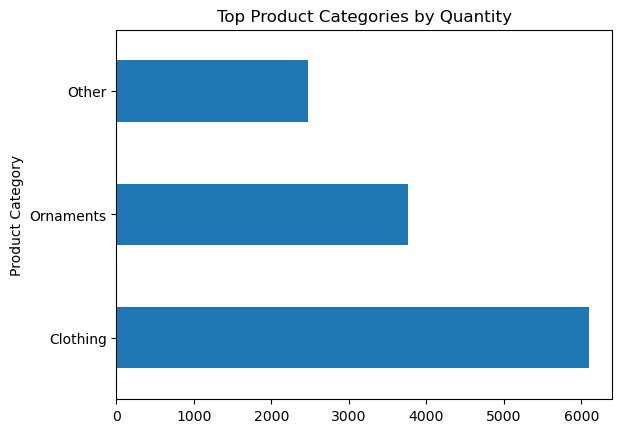

In [15]:
# Membuat kategori produk terlaris berdasarkan kuantitas produk
# Make Bestsellers product base on Quantity of product
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
top_products.plot(kind='barh', title='Top Product Categories by Quantity')

Berdasarkan plot di atas menunjukkan bahwa pakaian adalah produk paling banyak dibeli oleh kostumer

Base on the plot show that Clothing is the bestsellers product bought by customers

#### Shows the rating ordered that have a riview and make a plot the Rating using pie plot which is categorized as Good and Bad Rating

In [9]:
# Jumlah total order
# Number of order total
total_orders = df['Order ID'].nunique()

# Jumlah order yang punya rating (anggap rating tidak null)
# Number of orders that have ratings (assume no zero ratings)
reviewed_orders = df[df['Rating'].notnull()]['Order ID'].nunique()

# Rasio review
review_ratio = reviewed_orders / total_orders
print(f"Rasio pesanan yang diberi Rating: {review_ratio:.2%}")

Rasio pesanan yang diberi Rating: 100.00%


Berdasarkan data rating menunjukkan bahwa semua data diberi rating

Base of rating data show that data is rated completly

#### Make a pie plot of rating ditribution which is differentiated by good and bad category 

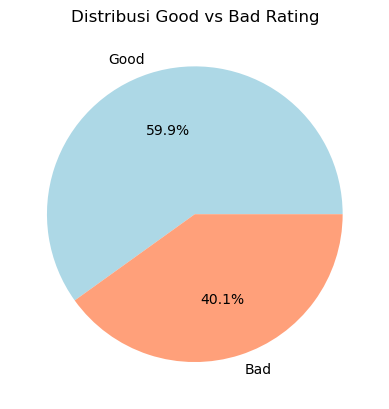

In [10]:
# Kelompokkan rating (>=4 adalah bagus)
# Grouping the Rating (>= 4 is Good) 
df['review_sentiment'] = df['Rating'].apply(lambda x: 'Good' if x >= 4 else 'Bad')

# Hitung jumlahnya
# Count the total
review_counts = df['review_sentiment'].value_counts(normalize=True) * 100

# Plot
# Tentukan warna: urutannya harus sesuai dengan urutan label di data
# Set the colors: the order according to the order of the labels in the data
custom_colors = ['#ADD8E6', '#FFA07A']  
# Contoh: Kode Biru untuk rating bagus, Kode Merah untuk rating buruk
# example: Blue code for good ratings, red code for bad ratings

# Plot pie chart dengan warna kustom
# Plot the pie chart with custom colors
review_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   colors=custom_colors,
                   title='Distribusi Good vs Bad Rating')

plt.ylabel('')  # Hilangkan label Y # drop Y label
plt.show()


Berdasarkan tampilan pie plot, 59,9% merupakan penilaian baik dan 40,1% merupakan penilaian buruk untuk produk tersebut.

Base on the pie plot view that 59.9% is a good rating and 40.1% is a bad rating for the product

#### Centiment Analyst

In [11]:
pip install textblob

sentiment
Positif    0.561266
Negatif    0.270354
Netral     0.168380
Name: proportion, dtype: float64


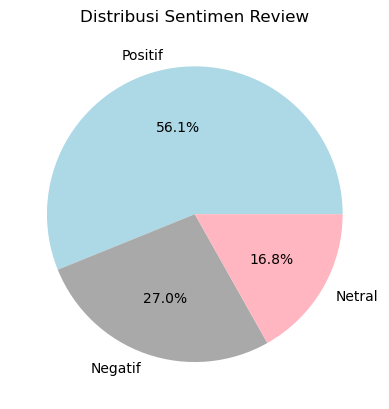

In [12]:
from textblob import TextBlob

# df['review'] adalah kolom teks ulasan
# df ['review'] is a review text column
def get_sentiment(text):
    blob = TextBlob(str(text))  # ubah ke string untuk jaga-jaga # Change to string 
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positif'
    elif polarity < -0.1:
        return 'Negatif'
    else:
        return 'Netral'

# Terapkan ke dataset
# Apply to dataset
df['sentiment'] = df['Review'].apply(get_sentiment)

# Lihat distribusi sentimen
# view centiment distribution
print(df['sentiment'].value_counts(normalize=True))

# Visualisasi
# Visualization
custom_colors = ['#ADD8E6', '#A9A9A9', '#FFB6C1']
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                    colors=custom_colors,
                                    title='Distribusi Sentimen Review')
plt.ylabel('')
plt.show()


Distribusi ulasan Centiment menunjukkan bahwa dari 100% ulasan, 56,1% positif, 16,8% netral, dan 27% negatif.

Centiment's review distribution shows that out of 100% reviews, 56.1% are positive, 16.8% are neutral, and 27% are negative.

#### WordCloud of positive and negative Reviews

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


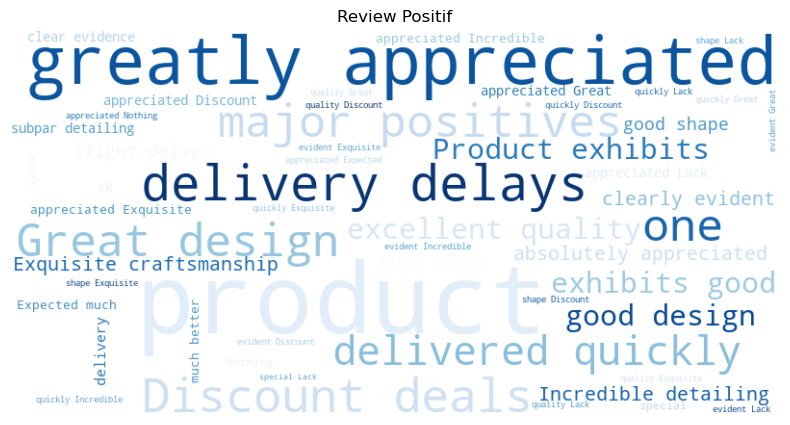

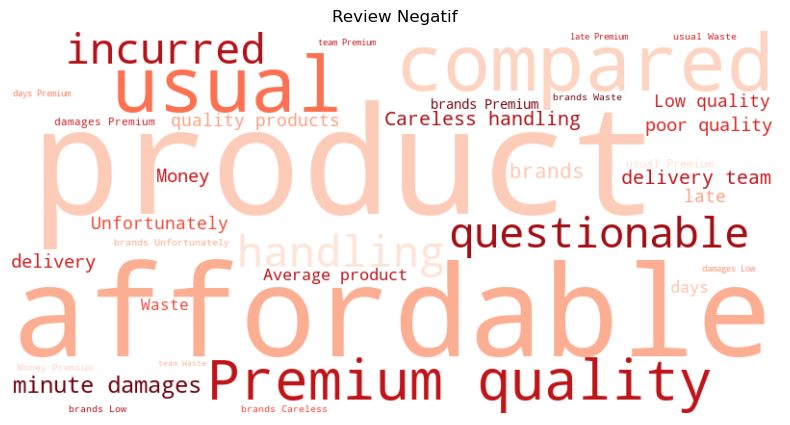

In [14]:
from wordcloud import WordCloud

# Filter berdasarkan sentimen (pastikan sudah ada kolom 'sentiment')
# Filter by centiment (make sure that you have 'centiment' column)
positif_reviews = " ".join(df[df['sentiment'] == 'Positif']['Review'].dropna().astype(str))
negatif_reviews = " ".join(df[df['sentiment'] == 'Negatif']['Review'].dropna().astype(str))

# WordCloud untuk review positif
# Wordcloud for positive review
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positif_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Review Positif')
plt.show()

# WordCloud untuk review negatif
# WordCloud for negative centiment
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negatif_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Review Negatif')
plt.show()

Berdasarkan gambar wordcloud di atas menunjukkan bahwa produk hingga proses pengiriman dapat diapresiasi. Hal ini dikarenakan produk memiliki kualitas dan design yang sangat baik, harga terjangkau, detail, serta konfirmasi diskon hingga penundaan pengiriman yang jelas, tetapi masih ada produk yang kualitasnya rendah dengan harga yang terjangkau

Base on the wordcloud, it shows that the product until delevery process is apreciated, its because the product have a good quality and design, reasonable price, detail, also clear confirmation of dicount and delevery delay. But some products also have low quality with affordable prices.

#### conclusion

Berdasarkan beberapa langkah yang telah dilakukan data Data Penjualan Ritel Global: Pesanan, Ulasan & Tren menunjukkan bahwa secara keseluruhan ulasan produk memiliki hasil yang baik. Hal tersebut dapat dilihat dari hasil penilian kostumer berdasarkan rating dan review yang diberikan. 

Based on several steps that have been taken, the Global Retail Sales Data: Orders, Reviews & Trends shows that overall product reviews have good results. This can be seen from the results of customer assessments based on the ratings and reviews given. 